# What factors correlate with economic development?

**December 2016**

**Author: George Qian** 

**Contact: george.qian@stern.nyu.edu**

# Introduction

Many factors goes into transforming a nation from a third-world country to a first world country. As the saying goes "correlation does not equal causation", in this project I will only be looking at the correlation between a variable in development such as foreign direct investment and the country's GDP/GNI growth. I'm going to determine which of the factors I've chosen correlates most closely with a country's economic development. I'm going to explore the correlation between those factors and the country's wealth distribution. The correlation could be further explored to determine if there is a causation. 


# Packages Imported

In [1]:
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics 
import seaborn as sns                  # seaborn graphics package
import numpy as np                     # foundation for pandas
import sys                             # system module 
import datetime as dt                  # date and time module


%matplotlib inline

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Dataset

Usually data on developing countries are difficult to gather as most of those countries lacks in census and other data collection. Out of all the global agencies, the World Bank has one of the most extensive collection of data for developing countries. The data for this report was collected from World Bank DataBank. I downloaded the datasets I needed and reuploaded to Github so others could also have access to the data used. 


**Countries Chosen:**
Burundi, Djibouti, Ethiopia, Kenya, Madagascar, Tanzania, Uganda, Zambia, and Zimbabwe 

**Factors:**

1. Foreign direct investment, net inflows 
2. Arable land 
3. Central government debt, total 
4. Children out of school 
5. Female genital mutilation prevalence 
6. Fertilizer consumption 
7. Firms expected to give gifts in meetings with tax officials 
8. Health expenditure per capita, PPP 
9. Literacy rate, adult male
10. Net ODA received per capita 

**Economic Development Indicators:**

1. GDP
2. GNI

**Wealth Distribution**

1.. GINI Coefficient 




In [2]:
#Importing the data from github
url = 'https://raw.githubusercontent.com/ghq201/databootcamp/master/Project%20Data.csv' 
wb = pd.read_csv(url)
wb.head(153)

,Series Name,Country Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,"Foreign direct investment, net inflows (BoP, c...",Burundi,-11440.9127,..,..,44690.7076,584701.6926,31593.77819,500245.0931,3833208.348,348404.5346,780582.0036,3354999.181,604919.6515,6884806.836,47060908.13,7360491.402
1,"Foreign direct investment, net inflows (BoP, c...",Tanzania,549270351.5,395567134,318401298.7,442539548.4,935520591.7,403038991.4,581511807,1383260000,952630000,1813200000,1229361018,1799646137,2087261310,2044550443,1960581620
2,"Foreign direct investment, net inflows (BoP, c...",Kenya,5302622.939,27618447.06,81738242.64,46063931.45,21211685.4,50674725.18,729044146,95585680.23,116257609,178064606.8,139862091.1,163410210.3,371846696.4,944327305,1437000004
3,"Foreign direct investment, net inflows (BoP, c...",Uganda,151496150.7,184648059.2,202192593.6,295416479.8,379808340.7,644262499.9,792305780.9,728860900.7,841570802.7,543872727.3,894293858,1205388488,1096000000,1058564540,1057301392
4,"Foreign direct investment, net inflows (BoP, c...",Zambia,145000000,298390000,347000000,364040000,356940000,615790000,1323900000,938620000,694800000,1729300000,1108500000,1731500000,2099800000,1507800000,1653000000
5,"Foreign direct investment, net inflows (BoP, c...",Zimbabwe,3800000,25900000,3800000,8700000,102800000,40000000,68900000,51600000,105000000,165900000,387000000,399500000,400000000,544800000,421000000
6,"Foreign direct investment, net inflows (BoP, c...",Madagascar,93059224,14661798.07,12874087,52910748,85428623.9,294681941.5,789389724.1,1134497642,1293330142,809707320.3,738462649,810503138.6,566545549.9,350652561.7,517455239.4
7,"Foreign direct investment, net inflows (BoP, c...",Ethiopia,349400000,255000000,465000000,545100000,265111675.5,545257102.2,222000573,108537544,221459581.4,288271568.3,626509560.4,278562822.2,953000000,2132000000,2167600000
8,"Foreign direct investment, net inflows (BoP, c...",Djibouti,3392958.626,3432346.206,14224542.96,38543559.85,22203341.19,108287709.4,195351140.3,227654582.2,96859684.56,36501032.52,79000230.7,109998255.7,286004467.7,152998238.8,123998424.5
9,Arable land (% of land area),Burundi,37.96728972,38.39563863,38.55140187,38.35669782,37.22741433,35.04672897,33.09968847,35.04672897,36.99376947,36.99376947,38.94080997,42.83489097,46.72897196,..,..


# Cleaning the dataset 

As expected there are a lot of missing data for each countries. Some countries have more data than others and most only have data for a couple years for a certain variable.   

In [3]:
#Setting the index to Series and Country
wb=wb.set_index(['Series Name', 'Country Name'])

In [4]:
#Removing missing values
wb=wb.replace(to_replace=['..'], value=[np.nan]).head(152)

In [5]:
#Converting objects to float as for some reason the type still came out as object after .replace
for i in range(2001,2016):
    str_i=str(i)
    wb[str_i]=wb[str_i].apply(pd.to_numeric)
wb.dtypes

2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
dtype: object

In [6]:
#Transposing the dataset
wb=wb.T.head(152)
wb.head(152)

Series Name  Foreign direct investment, net inflows (BoP, current US$)  \
Country Name                                                   Burundi   
2001                                              -1.144091e+04          
2002                                                        NaN          
2003                                                        NaN          
2004                                               4.469071e+04          
2005                                               5.847017e+05          
2006                                               3.159378e+04          
2007                                               5.002451e+05          
2008                                               3.833208e+06          
2009                                               3.484045e+05          
2010                                               7.805820e+05          
2011                                               3.354999e+06          
2012                                               6.049197e+05          
2013                                               6.884807e+06          
2014                                               4.706091e+07          
2015                                               7.360491e+06          

Series Name                                                           \
Country Name      Tanzania         Kenya        Uganda        Zambia   
2001          5.492704e+08  5.302623e+06  1.514962e+08  1.450000e+08   
2002          3.955671e+08  2.761845e+07  1.846481e+08  2.983900e+08   
2003          3.184013e+08  8.173824e+07  2.021926e+08  3.470000e+08   
2004          4.425395e+08  4.606393e+07  2.954165e+08  3.640400e+08   
2005          9.355206e+08  2.121169e+07  3.798083e+08  3.569400e+08   
2006          4.030390e+08  5.067473e+07  6.442625e+08  6.157900e+08   
2007          5.815118e+08  7.290441e+08  7.923058e+08  1.323900e+09   
2008          1.383260e+09  9.558568e+07  7.288609e+08  9.386200e+08   
2009          9.526300e+08  1.162576e+08  8.415708e+08  6.948000e+08   
2010          1.813200e+09  1.780646e+08  5.438727e+08  1.729300e+09   
2011          1.229361e+09  1.398621e+08  8.942939e+08  1.108500e+09   
2012          1.799646e+09  1.634102e+08  1.205388e+09  1.731500e+09   
2013          2.087261e+09  3.718467e+08  1.096000e+09  2.099800e+09   
2014          2.044550e+09  9.443273e+08  1.058565e+09  1.507800e+09   
2015          1.960582e+09  1.437000e+09  1.057301e+09  1.653000e+09   

Series Name                                                          \
Country Name     Zimbabwe    Madagascar      Ethiopia      Djibouti   
2001            3800000.0  9.305922e+07  3.494000e+08  3.392959e+06   
2002           25900000.0  1.466180e+07  2.550000e+08  3.432346e+06   
2003            3800000.0  1.287409e+07  4.650000e+08  1.422454e+07   
2004            8700000.0  5.291075e+07  5.451000e+08  3.854356e+07   
2005          102800000.0  8.542862e+07  2.651117e+08  2.220334e+07   
2006           40000000.0  2.946819e+08  5.452571e+08  1.082877e+08   
2007           68900000.0  7.893897e+08  2.220006e+08  1.953511e+08   
2008           51600000.0  1.134498e+09  1.085375e+08  2.276546e+08   
2009          105000000.0  1.293330e+09  2.214596e+08  9.685968e+07   
2010          165900000.0  8.097073e+08  2.882716e+08  3.650103e+07   
2011          387000000.0  7.384626e+08  6.265096e+08  7.900023e+07   
2012          399500000.0  8.105031e+08  2.785628e+08  1.099983e+08   
2013          400000000.0  5.665455e+08  9.530000e+08  2.860045e+08   
2014          544800000.0  3.506526e+08  2.132000e+09  1.529982e+08   
2015          421000000.0  5.174552e+08  2.167600e+09  1.239984e+08   

Series Name  Arable land (% of land area)    ...      \
Country Name                      Burundi    ...       
2001                            37.967290    ...       
2002                            38.395639    ...       
2003                            38.551402    ...       
2004                        

In [7]:
#separating the datasets 
FDI=wb['Foreign direct investment, net inflows (BoP, current US$)']
Arable=wb['Arable land (% of land area)']
ArablePP=wb['Arable land (hectares per person)']
CGDebt=wb['Central government debt, total (% of GDP)']
CooSchool=wb['Children out of school (% of primary school age)']
FemaleGM=wb['Female genital mutilation prevalence (%)']
FertCons=wb['Fertilizer consumption (kilograms per hectare of arable land)']
Firms=wb['Firms expected to give gifts in meetings with tax officials (% of firms)']
GDP=wb['GDP (constant LCU)']
GDPPC=wb['GDP per capita (constant LCU)']
GINI=wb['GINI index (World Bank estimate)']
GNI=wb['GNI (constant LCU)']
GNIPC=wb['GNI per capita (constant LCU)']
HealthEx=wb['Health expenditure per capita, PPP (constant 2011 international $)']
LiteracyM=wb['Literacy rate, adult male (% of males ages 15 and above)']
LiteracyF=wb['Literacy rate, adult female (% of females ages 15 and above)']
ODA=wb['Net ODA received per capita (current US$)']

Factors = [FDI,Arable,ArablePP,CGDebt,CooSchool,FemaleGM,FertCons,Firms,HealthEx,LiteracyM,LiteracyF,ODA]
Economic_Indicator = [GDP,GDPPC,GINI,GNI,GNIPC]

# Country Trends 

Here are some important trends that I have decided to look at for each country's development.

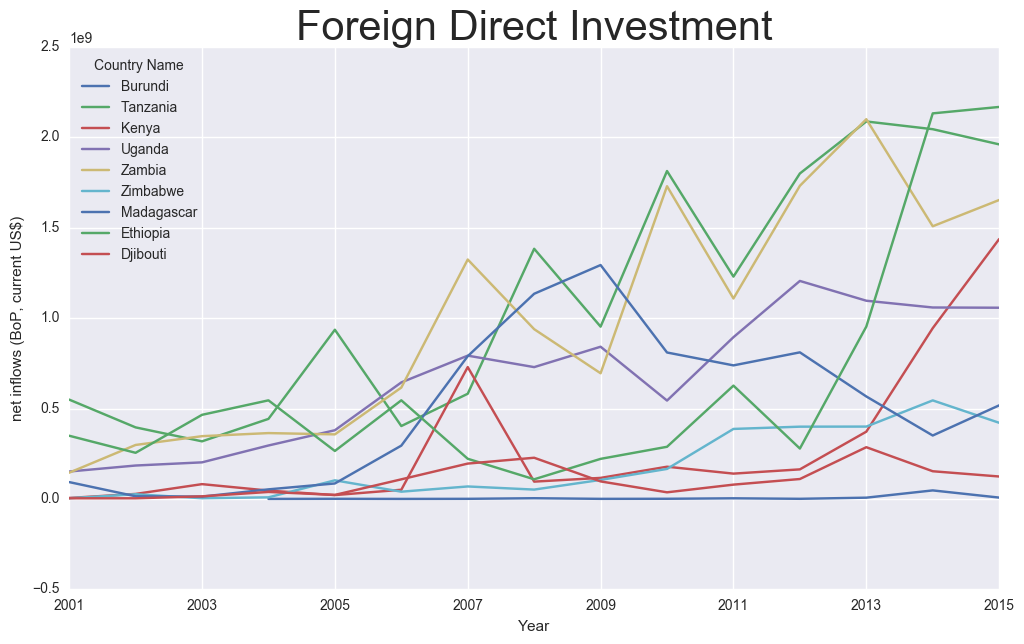

In [8]:
fig, ax = plt.subplots(figsize=(12,7))
FDIGraph=FDI.plot(ax=ax,kind='line')
FDIGraph.set(ylabel="net inflows (BoP, current US$)", xlabel="Year")
FDIGraph.set_title('Foreign Direct Investment',fontsize= 30)

There has been a general upward trend for foreign direct investment, which could prove beneficial to a country's growth. 

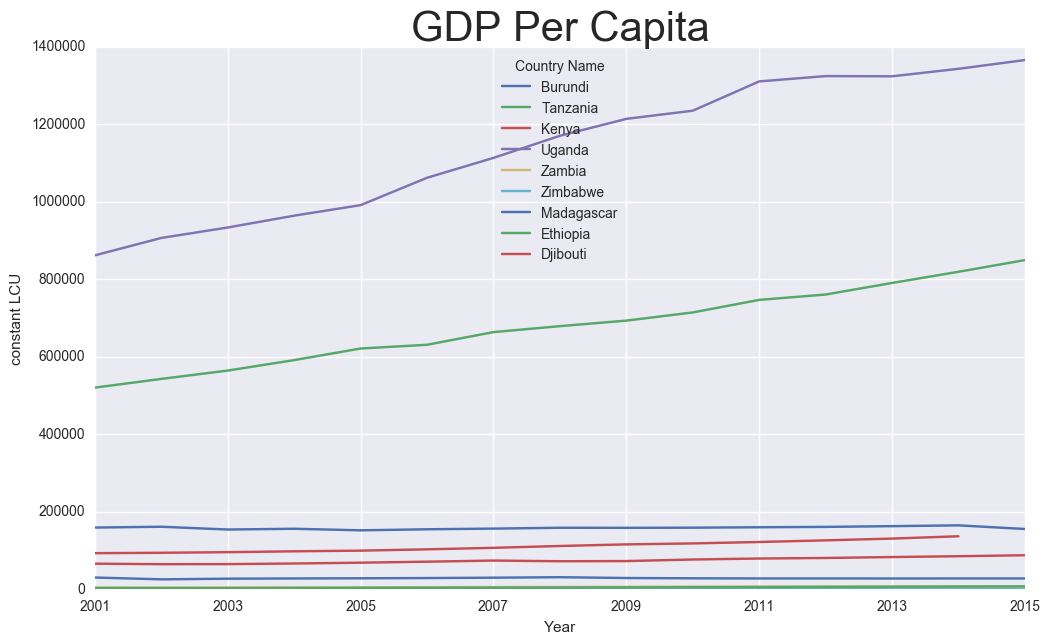

In [9]:
fig, ax = plt.subplots(figsize=(12,7))
GDPGraph=GDPPC.plot(ax=ax,kind='line')
GDPGraph.set(ylabel="constant LCU", xlabel="Year")
GDPGraph.set_title('GDP Per Capita',fontsize= 30)

Over the past 15 years, Tanzania and Burundi has experienced a steady pace of growth while other east African countries have not been as successful. 

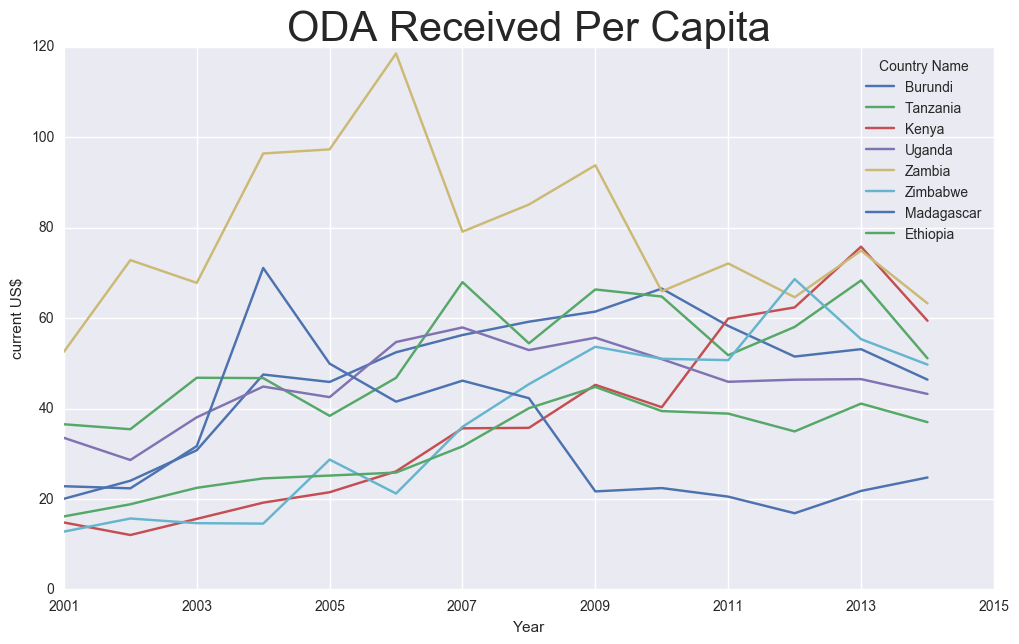

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
ODAGraph=ODA.plot(ax=ax,kind='line')
ODAGraph.set(ylabel="current US$", xlabel="Year")
ODAGraph.set_title('ODA Received Per Capita',fontsize= 30)

ODA received per capita has been fairly constant over the past fifteen years 

# Correlation Analysis

Here we are looking at the correlation between the various factors and economic development indicators. I will first to do a country-by-country correlation analysis on two factors that are hotly debated on whether they are beneficial to the country, FDI/ODI receieved. Afterwards, I'm going to take a look at an average of the correlations for each factor. 

In [11]:
FDI.corrwith(GDPPC)

Country Name
Burundi       0.607749
Tanzania      0.898924
Kenya         0.742627
Uganda        0.943575
Zambia        0.908454
Zimbabwe     -0.209844
Madagascar    0.475567
Ethiopia      0.718622
Djibouti      0.626656
dtype: float64

In [12]:
ODA.corrwith(GDPPC)

Country Name
Burundi       0.023684
Djibouti           NaN
Ethiopia      0.787868
Kenya         0.953954
Madagascar    0.217758
Tanzania      0.679012
Uganda        0.520942
Zambia       -0.210540
Zimbabwe     -0.634979
dtype: float64

In [13]:
#Creating a dictionary of variables to correlation mean 
Factorname = ['FDI','Arable Land','Arable Land per person','Central Government Debt','Childern out of School',
              'Female Genital Mutilation','Fertilizer Consumption','Firms Expected to Give Gifts','Health Expenditure',
              'Male Literacy','Female Literacy','ODA']
GDPPC_Correlation = {}
for i in range(0,12): 
    corr=Factors[i].corrwith(GDPPC)
    s=float(corr.mean())
    GDPPC_Correlation[Factorname[i]]=s


GNIPC_Correlation = {}
for i in range(0,12): 
    corr=Factors[i].corrwith(GNI)
    s=float(corr.mean())
    GNIPC_Correlation[Factorname[i]]=s


GINIPC_Correlation = {}
for i in range(0,12): 
    corr=Factors[i].corrwith(GINI)
    s=float(corr.mean())
    GINIPC_Correlation[Factorname[i]]=s


   
  


In [14]:
#Converting the dictionaries to dataframe
GINIC=pd.DataFrame.from_dict(GINIPC_Correlation,orient='index')
GNIC=pd.DataFrame.from_dict(GNIPC_Correlation,orient='index')
GDPC=pd.DataFrame.from_dict(GDPPC_Correlation,orient='index')
Correlation=pd.concat([GDPC,GNIC,GINIC],axis=1)
Correlation.columns = ["GDP Correlation", "GNI Correlation", "GINI Correlation"]
print (Correlation)

                              GDP Correlation  GNI Correlation  \
Arable Land                          0.594185         0.490864   
Female Literacy                      0.662855         0.619695   
Firms Expected to Give Gifts        -0.450655        -0.333333   
ODA                                  0.292212         0.259025   
Central Government Debt             -0.803328        -0.772863   
Health Expenditure                   0.720573         0.488152   
Arable Land per person              -0.002488        -0.531274   
Fertilizer Consumption               0.605998         0.397868   
FDI                                  0.634703         0.730611   
Male Literacy                        0.818428         0.231726   
Childern out of School              -0.484041        -0.578972   
Female Genital Mutilation            0.001647         0.000320   

                              GINI Correlation  
Arable Land                       1.297672e-01  
Female Literacy                   0.000000e

# Conclusion

As I mentioned before "correlation does not equal causation"; however, after running the analysis we determined some factors that we should look further into and some factors that we know are most likely not related. There is a sufficiently high correlation for factors such as Male Literacy, Fertilizer Consumption, Health Expediture, Childern out of School, and Central Government Debt to warrant further exploration. Some factors such as Female Genital Mutilation and ODA Received have low correlation with economic development, so those factors might be not be as important to the success of a country as the other factors. As for wealth distribtion, it seems uncorrelated with any of the factors I have chosen. 

# Data Source

**World Bank DataBank**